In [210]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
tf.version.VERSION

'2.0.0-rc2'

In [12]:
c = tf.constant(3.)
x = tf.Variable(5.)

In [17]:
with tf.GradientTape() as t:
    y = tf.sigmoid(c*x)
    dy_dx = t.gradient(y, x)


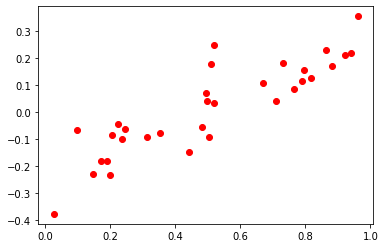

In [113]:
plt.plot(x.numpy(), y.numpy(), 'ro')

In [187]:
a_true = tf.constant(-0.25) # intercept
b_true = tf.constant(0.5)   # slope

x = tf.random.uniform((96,))
e = tf.random.normal((96,), 0, 0.1)
y = a_true + b_true*x + e

a = tf.Variable(0.)
b = tf.Variable(tf.random.uniform(()))
lr = tf.constant(0.5)

for epoch in range(100): # training loop!
    with tf.GradientTape() as t:
        E = tf.reduce_mean((a + b*x - y)**2)
        [dE_da, dE_db] = t.gradient(E, [a, b])
        a.assign_sub(lr*dE_da) # a -= 
        b.assign_sub(lr*dE_db)

print(a.numpy(), b.numpy())

X = np.stack([x.numpy()**0, x.numpy()], axis=1)
Y = y.numpy()
(a_hat, b_hat), _, __, ___ = np.linalg.lstsq(X, Y, rcond=-1)
print(a_hat, b_hat)
print(a_true, b_true)

-0.20183003 0.3922699
-0.20180991 0.39223003
tf.Tensor(-0.25, shape=(), dtype=float32) tf.Tensor(0.5, shape=(), dtype=float32)


In [261]:
dataset = tf.data.Dataset.from_tensor_slices
x = tf.constant([0., 1., 2., 3., 4., 5., 6.])
y = tf.constant([7., 8., 9., 10., 11., 12., 13.])
D = dataset((x, y))

for a, b in D.repeat(2).batch(3):
    print(a, b)

tf.Tensor([0. 1. 2.], shape=(3,), dtype=float32) tf.Tensor([7. 8. 9.], shape=(3,), dtype=float32)
tf.Tensor([3. 4. 5.], shape=(3,), dtype=float32) tf.Tensor([10. 11. 12.], shape=(3,), dtype=float32)
tf.Tensor([6. 0. 1.], shape=(3,), dtype=float32) tf.Tensor([13.  7.  8.], shape=(3,), dtype=float32)
tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32) tf.Tensor([ 9. 10. 11.], shape=(3,), dtype=float32)
tf.Tensor([5. 6.], shape=(2,), dtype=float32) tf.Tensor([12. 13.], shape=(2,), dtype=float32)


In [262]:
for a, b in D.batch(3).repeat(2):
    print(a, b)

tf.Tensor([0. 1. 2.], shape=(3,), dtype=float32) tf.Tensor([7. 8. 9.], shape=(3,), dtype=float32)
tf.Tensor([3. 4. 5.], shape=(3,), dtype=float32) tf.Tensor([10. 11. 12.], shape=(3,), dtype=float32)
tf.Tensor([6.], shape=(1,), dtype=float32) tf.Tensor([13.], shape=(1,), dtype=float32)
tf.Tensor([0. 1. 2.], shape=(3,), dtype=float32) tf.Tensor([7. 8. 9.], shape=(3,), dtype=float32)
tf.Tensor([3. 4. 5.], shape=(3,), dtype=float32) tf.Tensor([10. 11. 12.], shape=(3,), dtype=float32)
tf.Tensor([6.], shape=(1,), dtype=float32) tf.Tensor([13.], shape=(1,), dtype=float32)


In [259]:
for a, b in D.batch(3).repeat(2):
    print(a, b)

tf.Tensor([0. 1. 2.], shape=(3,), dtype=float32) tf.Tensor([6. 7. 8.], shape=(3,), dtype=float32)
tf.Tensor([3. 4. 5.], shape=(3,), dtype=float32) tf.Tensor([ 9. 10. 11.], shape=(3,), dtype=float32)
tf.Tensor([0. 1. 2.], shape=(3,), dtype=float32) tf.Tensor([6. 7. 8.], shape=(3,), dtype=float32)
tf.Tensor([3. 4. 5.], shape=(3,), dtype=float32) tf.Tensor([ 9. 10. 11.], shape=(3,), dtype=float32)


In [280]:
a_true = tf.constant(-0.25) # true intercept
b_true = tf.constant(0.5)   # true slope

n = 96                      # number of data points
x = tf.random.uniform((N,))
e = tf.random.normal((N,), 0, 0.1) # errors in y
y = a_true + b_true*x + e

EPOCHS = 100 # number of traversals of the dataset
BATCHES_PER_EPOCH = 3

dataset = tf.data.Dataset.from_tensor_slices((x, y))

a = tf.Variable(0.) # initial intercept estimate
b = tf.Variable(tf.random.uniform(())) # initial slope estimate
lr = tf.constant(0.25) # learning rate

for x, y in dataset.shuffle(n) \
                   .repeat(EPOCHS) \
                   .batch(BATCHES_PER_EPOCH):
    with tf.GradientTape() as t:
        E = tf.reduce_mean((a + b*x - y)**2)
        [dE_da, dE_db] = t.gradient(E, [a, b])
        a.assign_sub(lr*dE_da) # a -= 
        b.assign_sub(lr*dE_db)

print(a.numpy(), b.numpy())

-0.23621197 0.43761775
-0.25 0.5


In [282]:
dataset.__class__

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset